# Communicating with the lab server

In [1]:
import Pyro5.api as pyro
import json

srv = pyro.Proxy("PYRO:LabServer@localhost:50000")
print(json.dumps(srv.status(), indent = 2)     )       # full snapshot

print(f"available wheels: {srv.status()['online_wheels']}")



{
  "wheels": {
    "fw1": {
      "serial": "TP1296219-5150",
      "connected": true,
      "position": 2,
      "current_filter": "FBH 1050-10",
      "type": "bandpass"
    },
    "fw2": {
      "serial": "TP1296219-5149",
      "connected": false,
      "position": null,
      "current_filter": null,
      "type": "bandpass"
    },
    "fw3": {
      "serial": "150414-041498",
      "connected": true,
      "position": 1,
      "current_filter": "EMPTY",
      "type": "bandpass"
    },
    "fw4": {
      "serial": "150824-011498",
      "connected": false,
      "position": null,
      "current_filter": null,
      "type": "nd"
    }
  },
  "shutter": {
    "connected": true,
    "state": "closed",
    "line": "FIO4",
    "address": "ANY"
  },
  "ammeter_A": 7.184497e-09,
  "offline_wheels": [
    "fw2",
    "fw4"
  ],
  "online_wheels": [
    "fw1",
    "fw3"
  ]
}
available wheels: ['fw1', 'fw3']


reading current from the ammeter
7.156396e-09
result: 
 {
  "n_samples": 100,
  "mean": 7.391828989999999e-09,
  "median": 7.3845705e-09,
  "std": 2.1540115200297766e-10,
  "samples": [
    7.339032e-09,
    7.097087e-09,
    7.582864e-09,
    7.090465e-09,
    7.421683e-09,
    7.449961e-09,
    7.526545e-09,
    7.663266e-09,
    7.484932e-09,
    7.038842e-09,
    7.455265e-09,
    7.81437e-09,
    7.480486e-09,
    7.282265e-09,
    7.442983e-09,
    7.72579e-09,
    6.971423e-09,
    7.435126e-09,
    7.815474e-09,
    7.591126e-09,
    7.484401e-09,
    7.273536e-09,
    7.222148e-09,
    7.061065e-09,
    7.59597e-09,
    7.961329e-09,
    7.610247e-09,
    7.261598e-09,
    7.282553e-09,
    7.423838e-09,
    7.279901e-09,
    7.390621e-09,
    7.527978e-09,
    7.328758e-09,
    7.288419e-09,
    7.811419e-09,
    7.666337e-09,
    7.202091e-09,
    7.431403e-09,
    7.344326e-09,
    7.4656e-09,
    7.306951e-09,
    7.035627e-09,
    7.342893e-09,
    7.148024e-09,
    7.218

Text(0.5, 1.0, 'Ammeter Multisample Readings')

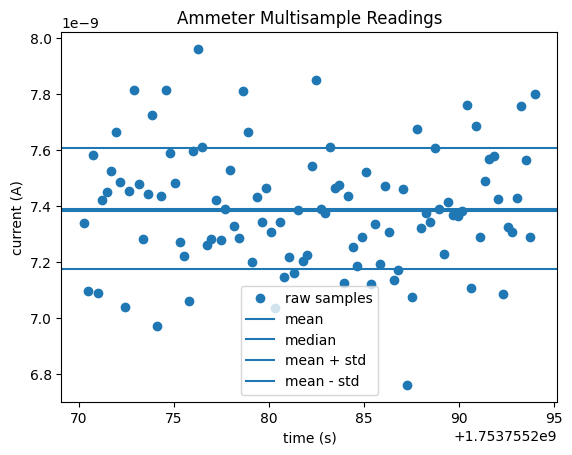

In [ ]:
# Test out the ammeter

print("reading current from the ammeter")
print(srv.read_current())

res = srv.read_multisample_current(100, dt=0.1, return_arr=True)
print(f"result: \n {json.dumps(res, indent=2)}")

# Plot the results
import matplotlib.pyplot as plt
plt.plot(res["times"], res["samples"], 'o', label = "raw samples")
plt.axhline(res["mean"], label = "mean")
plt.axhline(res["median"], label = "median")
plt.axhline(res["mean"] + res["std"], label = "mean + std")
plt.axhline(res["mean"] - res["std"], label = "mean - std")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("current (A)")
plt.title("Ammeter Multisample Readings")


In [2]:
print("moving to 1250 nm bandpass filter")
srv.select_bandpass(1250)      # 1250 nm in path
print(json.dumps(srv.wheel_status('fw1'), indent = 2))

print("moving to the 1050 nm bandpass filter")
srv.select_bandpass(1050)      # 1050 nm in path
print(json.dumps(srv.wheel_status('fw1'), indent = 2))


moving to 1250 nm bandpass filter
{
  "serial": "TP1296219-5150",
  "connected": true,
  "position": 4,
  "current_filter": "FBH 1250-10",
  "type": "bandpass"
}
moving to the 1050 nm bandpass filter
{
  "serial": "TP1296219-5150",
  "connected": true,
  "position": 2,
  "current_filter": "FBH 1050-10",
  "type": "bandpass"
}


In [3]:
# open and close the shutter
print("opening the shutter")
srv.shutter("open")
print(srv.status()["shutter"])

print("closing the shutter")
srv.shutter("close")
print(srv.status()["shutter"])

opening the shutter
{'connected': True, 'state': 'open', 'line': 'FIO4', 'address': 'ANY'}
closing the shutter
{'connected': True, 'state': 'closed', 'line': 'FIO4', 'address': 'ANY'}


In [ ]:
             # whole-rack snapshot

#srv.set_nd(1.0)        # moves ND wheel to the 'ND 1.0' slot
#print(srv.status())


KeyError: 'No ND filter ≈1.0 (±0.05)'

reading current from the ammeter
7.419732e-09


ValueError: malformed node or string on line 2: <ast.Call object at 0x000002190C45B340>